In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

## Read in the cleaned dataset

In [3]:
df = pd.read_pickle("data/modified_data")
df.head()

,Wikipedia ID,Title,Metadata
0,620,animal farm,george_orwell roman à clef satire children's l...
1,843,a clockwork orange,anthony_burgess science fiction novella specul...
2,986,the plague,albert_camus existentialism fiction absurdist ...
3,1756,an enquiry concerning human understanding,david_hume the argument of the enquiry proce...
4,2080,a fire upon the deep,vernor_vinge hard science fiction science fict...


---

## Vectorize the metadata and plot summaries

- This converts plot summaries and metadata of each book into a numeric vector.
- Token pattern ensure that words with underscores are kept together.
- Removes token that do not occur more than 5 times in the data, or show up more than half the time.

In [7]:
tfidf = TfidfVectorizer(analyzer = 'word', min_df=5, max_df = 0.5, stop_words='english',token_pattern=r"(?u)\S\S+")

metadata_tfidf = tfidf.fit_transform(df['Metadata'])

In [8]:
# first 50 words
print(tfidf.get_feature_names_out()[0:50])

['!!' '"...' '"a' '"a"' '"about' '"accident"' '"accident".' '"accidental"'
 '"accidentally"' '"after' '"air' '"all' '"almost' '"always' '"american'
 '"an' '"and' '"andalite' '"any' '"are' '"as' '"at' '"aunt' '"aunt"'
 '"back' '"bad' '"be' '"beautiful' '"beauty' '"because' '"become'
 '"before' '"being' '"best' '"better' '"better"' '"beware' '"beyond'
 '"big' '"black' '"blind' '"blood' '"bloody' '"blue' '"body' '"book'
 '"borrow"' '"borrowed"' '"boy"' '"brave']


In [9]:
tfidf_data = pd.DataFrame(metadata_tfidf.toarray(),index=df["Title"], columns=tfidf.get_feature_names_out())

---

## Cosine Similarities between books

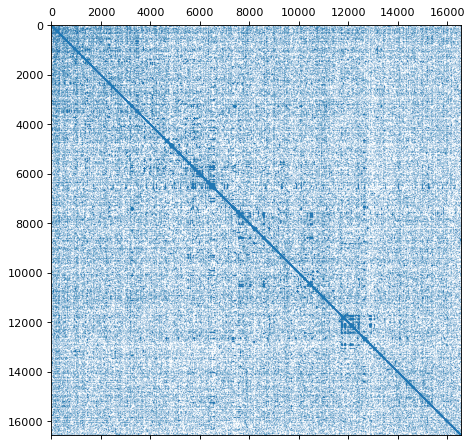

In [12]:
book_sim = cosine_similarity(metadata_tfidf)

plt.figure(figsize=(6, 6), dpi=80)
plt.spy(book_sim, precision = 0.1, markersize = 0.04)
plt.tight_layout()
plt.show()

---

## Recommendation Function

In [73]:
def recommend_books(title, author, summary, genres=None, cosine_matrix=book_sim, n=5, df = df):
    # format inputs
    metadata = author.strip().replace(' ','_') + " " + summary
    if genres:
        metadata += " " + genres
    
    # create TF-IDF vectorizer 
    tfidf = TfidfVectorizer(analyzer = 'word', min_df=5, max_df = 0.5, stop_words='english',token_pattern=r"(?u)\S\S+")

    new_df = df['Metadata'].tolist() + [metadata]
    tfidf_matrix = tfidf.fit_transform(new_df)

    # calculate cosine similarity between the input book and dataset
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

    # find top n similar books
    similar = cosine_similarities[0].argsort()[::-1]
    
    recommended = df.iloc[similar]['Title'].tolist()[1:n+1]
    
    return recommended

In [79]:
recommend_books(title='Henry VI Part 1', author='William Shakespeare', summary="After Henry V's death and while Henry VI is young, nobles rule England and fight the French, including Joan of Arc. As Henry VI becomes King, the noble houses begin to divide and take sides between York and Lancaster. The war with France winds down, and the nobles try to find Henry a wife and disagree about who Henry chooses.", n=5, df=df)

['a farewell to arms',
 "the time traveler's wife",
 'henry v',
 'the monstrumologist',
 'the chestnut king']